### 一.证据近似的理论推导
上一节，由于$\alpha,\beta$需要人工设置，使得我们“定制版”的贝叶斯线性回归的表现大打折扣，所以理想情况下，我们需要将超参数$\alpha,\beta$的后验分布也考虑进来，那么此时的预测分布如下：   

$$
p(\hat{t}\mid t)=\int\int\int p(\hat{t}\mid w,\beta)p(w\mid t,\alpha,\beta)p(\alpha,\beta\mid t)\ dw\ d\alpha\  d\beta
$$  

这里，$t=\{t_1,t_2,...,t_n \}$表示训练数据的标签，$\hat{t}$表示需要预测的标签，为了表达的简洁，省略了训练数据$X=\{x_1,x_2,...,x_n\}$以及预测输入$\hat{x}$，另外积分项中的几个分布的意义与上一节一样，关于超参后验分布$p(\alpha,\beta\mid t)$，由[《14_03_概率分布：高斯分布（正态分布）及其共轭先验》](https://nbviewer.jupyter.org/github/zhulei227/ML_Notes/blob/master/notebooks/14_03_%E6%A6%82%E7%8E%87%E5%88%86%E5%B8%83%EF%BC%9A%E9%AB%98%E6%96%AF%E5%88%86%E5%B8%83%EF%BC%88%E6%AD%A3%E6%80%81%E5%88%86%E5%B8%83%EF%BC%89%E5%8F%8A%E5%85%B6%E5%85%B1%E8%BD%AD%E5%85%88%E9%AA%8C.ipynb)中关于后验分布的推导，我们可以有这样一个一般的结论：如果训练数据越多，那么后验分布就会越尖，所以我们不妨假设后验分布$p(\alpha,\beta\mid t)$在$\hat{\alpha},\hat{\beta}$处有尖峰，那么，预测分布的求解我们就可以近似为：   

$$
p(\hat{t}\mid t)\simeq p(\hat{t}\mid t,\hat{\alpha},\hat{\beta})=\int p(\hat{t}\mid w,\hat{\beta})p(w\mid t,\hat{\alpha},\hat{\beta})dw\int\int p(\alpha,\beta\mid t)\ d\alpha\ d\beta=\int p(\hat{t}\mid w,\hat{\beta})p(w\mid t,\hat{\alpha},\hat{\beta})dw
$$  

所以，我们现在的目标转为求解极大后验估计$p(\alpha,\beta\mid t)$，根据贝叶斯定理，我们知道：   

$$
p(\alpha,\beta \mid t)\propto p(t\mid \alpha,\beta)p(\alpha,\beta)
$$  

我们不妨假设先验分布$p(\alpha,\beta)$不能提供过多的背景信息，即它的分布很平，那么这时的$\hat{\alpha},\hat{\beta}$可以通过边缘似然函数$p(t\mid\alpha,\beta)$的极大似然估计获得，而$ln\  p(t\mid\alpha,\beta)$被称为证据函数，接下来我们推导其解析形式

### 二.求证据函数

边缘似然函数$p(t\mid \alpha,\beta)$可以通过对参数$w$求积分得到：   

$$
p(t\mid\alpha,\beta)=\int\ p(t\mid w,\beta)p(w\mid\alpha)dw\\
=\left(\frac{\beta}{2\pi}\right)^{\frac{N}{2}}\left(\frac{\alpha}{2\pi}\right)^{\frac{M}{2}}\int exp\{-E(w)\}dw
$$  

这里，$M$是$w$的维度，且：   

$$
E(w)=\beta E_D(w)+\alpha E_W(w)\\
=\frac{\beta}{2}\left\|t-\Phi w\right\|^2+\frac{\alpha}{2}w^Tw
$$  

接下来，我们对$w$配平方项：   

$$
E(w)=E(m_N)+\frac{1}{2}(w-m_N)^TA(w-m_N)
$$  

其中：   

$$
A=\alpha I+\beta\Phi^T\Phi\\
m_N=\beta A^{-1}\Phi^Tt\\
E(m_N)=\frac{\beta}{2}\left\|t-\Phi m_N\right\|^2+\frac{\beta}{2}m_N^Tm_N
$$  

通过对$w$的配方，接下来可以方便的求解出积分项：   

$$
\int exp\{-E(w)\}dw\\
=exp\{-E(m_N)\}\int exp\left\{-\frac{1}{2}(w-m_N)^TA(w-m_N)\right\}dw\\
=exp\left\{-E(m_N)\right\}(2\pi)^{\frac{M}{2}}\left|A\right|^{-\frac{1}{2}}
$$  

所以，证据函数就可以写出来了   

$$
ln\ p(t\mid\alpha,\beta)=\frac{M}{2}ln\ \alpha+\frac{N}{2}ln\ \beta-E(m_N)-\frac{1}{2}ln\ |A|-\frac{N}{2}ln(2\pi)
$$  

接下来就是优化的问题了

### 三.极大化证据函数

首先考虑$p(t\mid\alpha,\beta)$关于$\alpha$的最大化，我们首先定义下面的特征向量方程：   

$$
(\beta\Phi^T\Phi)\mu_i=\lambda_i\mu_i,i=1,2,...,M
$$  

由于$A=\alpha\ I+\beta\Phi^T\Phi$，所以A的特征值为$\alpha+\lambda_i$，所以$ln|A|$对$\alpha$的导数：   

$$
\frac{d}{d\alpha}ln\ |A|=\frac{d}{d\ln\alpha}\prod_i(\lambda_i+\alpha)=\frac{d}{d\ln\alpha}\sum_i ln(\lambda_i+\alpha)=\sum_i\frac{1}{\lambda_i+\alpha}
$$  
因此，$ln\ p(t\mid\alpha,\beta)$关于$\alpha$的驻点满足：   

$$
0=\frac{M}{2\alpha}-\frac{1}{2}m_N^Tm_N-\frac{1}{2}\sum_i\frac{1}{\lambda_i+\alpha}
$$  

我们令：   

$$
\gamma=\sum_i\frac{\lambda_i}{\lambda_i+\alpha}
$$  

整理可能$\alpha$满足：  

$$
\alpha=\frac{\gamma}{m_N^Tm_N}
$$  

注意，这里是个迭代公式，因为$\gamma,m_N$均与$\alpha$相关，接下来，我们看看$\beta$的求解，由于特征值$\lambda_i$正比于$\beta$，所以$\frac{d\lambda_i}{d\beta}=\frac{1}{\beta}$，所以：   

$$
\frac{d}{d\beta}ln\ |A|=\frac{d}{d\beta}\sum_i ln(\lambda_i+\alpha)=\frac{1}{\beta}\sum_i\frac{\lambda_i}{\lambda_i+\alpha}=\frac{\gamma}{\beta}
$$  

类似地，在驻点处满足如下关系：   

$$
0=\frac{N}{2\beta}-\frac{1}{2}\sum_{n=1}^N\left\{t_n-m_N^T\phi(x_n)\right\}^2-\frac{\gamma}{2\beta}
$$  

整理后可得：  

$$
\frac{1}{\beta}=\frac{1}{N-r}\sum_{n=1}^N\left\{t_n-m_N^T\phi(x_n)\right\}^2
$$

### 四.代码实现

代码实现主要就是反复迭代上面推导出来的两个公式：   

$$
\alpha=\frac{\gamma}{m_N^Tm_N}\\
\frac{1}{\beta}=\frac{1}{N-r}\sum_{n=1}^N\left\{t_n-m_N^T\phi(x_n)\right\}^2
$$

In [1]:
"""
线性回归的bayes估计，封装到ml_models.bayes中
"""
import numpy as np
import matplotlib.pyplot as plt


class LinearRegression(object):
    def __init__(self, basis_func=None, tol=1e-7, epochs=100, normalized=True):
        """
        :param basis_func: list,基函数列表，包括rbf,sigmoid,poly_{num},linear，fm,默认None为linear，其中poly_{num}中的{num}表示多项式的最高阶数,fm表示构建交叉因子
        :param tol:  两次迭代参数平均绝对值变化小于tol则停止
        :param epochs: 默认迭代次数
        :param normalized:是否归一化
        """
        if basis_func is None:
            self.basis_func = ['linear']
        else:
            self.basis_func = basis_func
        self.tol = tol
        self.epochs = epochs
        self.normalized = normalized
        # 特征均值、标准差
        self.feature_mean = None
        self.feature_std = None
        # 训练参数
        self.w = None

    def _map_basis(self, X):
        """
        将X进行基函数映射
        :param X:
        :return:
        """
        n_sample, n_feature = X.shape
        x_list = []
        for basis_func in self.basis_func:
            if basis_func == "linear":
                x_list.append(X)
            elif basis_func == "rbf":
                x_list.append(np.exp(-0.5 * X * X))
            elif basis_func == "sigmoid":
                x_list.append(1 / (1 + np.exp(-1 * X)))
            elif basis_func.startswith("poly"):
                p = int(basis_func.split("_")[1])
                for pow in range(1, p + 1):
                    x_list.append(np.power(X, pow))
            elif basis_func == 'fm':
                X_fm = np.zeros(shape=(n_sample, int(n_feature * (n_feature - 1) / 2)))
                c = 0
                for i in range(0, n_feature - 1):
                    for j in range(i + 1, n_feature):
                        X_fm[:, c] = X[:, i] * X[:, j]
                        c += 1
                x_list.append(X_fm)
        return np.concatenate(x_list, axis=1)

    def fit(self, X, y):
        if self.normalized:
            self.feature_mean = np.mean(X, axis=0)
            self.feature_std = np.std(X, axis=0) + 1e-8
            X_ = (X - self.feature_mean) / self.feature_std
        else:
            X_ = X
        X_ = self._map_basis(X_)
        X_ = np.c_[np.ones(X_.shape[0]), X_]
        n_sample, n_feature = X_.shape
        alpha = 1
        beta = 1
        current_w = None
        for _ in range(0, self.epochs):
            A = alpha * np.eye(n_feature) + beta * X_.T @ X_
            self.w = beta * np.linalg.inv(A) @ X_.T @ y.reshape((-1, 1))  # 即m_N
            if current_w is not None and np.mean(np.abs(current_w - self.w)) < self.tol:
                break
            current_w = self.w
            # 更新alpha,beta
            if n_sample // n_feature >= 100:
                # 利用prml中的公式3.98与3.99进行简化计算，避免求特征值的开销
                alpha = n_feature / np.dot(self.w.reshape(-1), self.w.reshape(-1))
                beta = n_sample / np.sum(np.power(y.reshape(-1) - self.predict(X).reshape(-1), 2))
            else:
                gamma = 0.0
                for lamb in np.linalg.eig(beta * X_.T @ X_)[0]:
                    gamma += lamb / (lamb + alpha)
                alpha = gamma.real / np.dot(self.w.reshape(-1), self.w.reshape(-1))
                beta = 1.0 / (
                    1.0 / (n_sample - gamma) * np.sum(np.power(y.reshape(-1) - self.predict(X).reshape(-1), 2)))
        #ml_models包中不会return,这里用作分析
        return alpha,beta

    def predict(self, X):
        if self.normalized:
            X_ = (X - self.feature_mean) / self.feature_std
        else:
            X_ = X
        X_ = self._map_basis(X_)
        X_ = np.c_[np.ones(X_.shape[0]), X_]
        return (self.w.T @ X_.T).reshape(-1)

    def plot_fit_boundary(self, x, y):
        """
        绘制拟合结果
        :param x:
        :param y:
        :return:
        """
        plt.scatter(x[:, 0], y)
        plt.plot(x[:, 0], self.predict(x), 'r')

### 测试
再在上一节的例子中测试一下

In [2]:
%matplotlib inline

In [3]:
#造伪样本
X=np.linspace(0,100,100)
X=np.c_[X,np.ones(100)]
w=np.asarray([3,2])
Y=X.dot(w)
X=X.astype('float')
Y=Y.astype('float')
X[:,0]+=np.random.normal(size=(X[:,0].shape))*3#添加噪声
Y=Y.reshape(100,1)

In [4]:
#添加噪声
X=np.concatenate([X,np.asanyarray([[100,1],[101,1],[102,1],[103,1],[104,1]])])
Y=np.concatenate([Y,np.asanyarray([[3000],[3300],[3600],[3800],[3900]])])

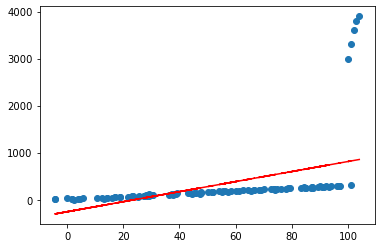

In [5]:
lr=LinearRegression()
alpha,beta=lr.fit(X[:,:-1],Y)
lr.plot_fit_boundary(X[:,:-1],Y)

In [6]:
alpha/beta

4.076823130998718

可以发现证据近似最终选择的L2正则化系数为4，而从上一节的测试可以发现最优的L2正则化系数应该在100左右，可以发现证据近似与我们的理想情况还有一定的距离，接下来我们看看利用变分推断拟合的效果会怎样